<a href="https://colab.research.google.com/github/himurali/deeplearningAIColab/blob/main/Bicycle_supervisedlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [15]:
url = "/content/sample_data/NYC-BikeShare-2015-2017-combined.csv"  # Replace with the URL of your dataset
bicycle_data = pd.read_csv(url)
print(bicycle_data.head())
# Convert date-time columns to datetime format
bicycle_data['Start Time'] = pd.to_datetime(bicycle_data['Start Time'])
bicycle_data['Stop Time'] = pd.to_datetime(bicycle_data['Stop Time'])

# Extract relevant features from date-time columns
bicycle_data['Start Hour'] = bicycle_data['Start Time'].dt.hour
bicycle_data['Start Day'] = bicycle_data['Start Time'].dt.day
bicycle_data['Start Month'] = bicycle_data['Start Time'].dt.month
bicycle_data['Start Year'] = bicycle_data['Start Time'].dt.year

# Drop original date-time columns
bicycle_data.drop(columns=['Start Time', 'Stop Time'], inplace=True)
bicycle_data.drop(columns=['Start Station Name', 'End Station Name', 'User Type' ], inplace=True)



   Unnamed: 0  Trip Duration           Start Time            Stop Time  \
0           0            376  2015-10-01 00:16:26  2015-10-01 00:22:42   
1           1            739  2015-10-01 00:27:12  2015-10-01 00:39:32   
2           2           2714  2015-10-01 00:32:46  2015-10-01 01:18:01   
3           3            275  2015-10-01 00:34:31  2015-10-01 00:39:06   
4           4            561  2015-10-01 00:40:12  2015-10-01 00:49:33   

   Start Station ID Start Station Name  Start Station Latitude  \
0              3212    Christ Hospital               40.734786   
1              3207        Oakland Ave               40.737604   
2              3193       Lincoln Park               40.724605   
3              3199       Newport Pkwy               40.728745   
4              3183     Exchange Place               40.716247   

   Start Station Longitude  End Station ID    End Station Name  \
0               -74.050444            3207         Oakland Ave   
1               -74.052478

Mean Squared Error: 0.10177178399804825
                    feature  coefficient
0                Unnamed: 0     0.000036
1             Trip Duration     0.000027
2          Start Station ID     0.003004
3    Start Station Latitude    -1.692362
4   Start Station Longitude     0.425045
5            End Station ID     0.000375
6      End Station Latitude    -0.786143
7     End Station Longitude    -1.051661
8                   Bike ID     0.000173
9                Birth Year     0.000355
10                   Gender     0.012541
11               Start Hour    -0.001645
12                Start Day    -0.000625
13              Start Month    -0.027858
14               Start Year    -0.117658


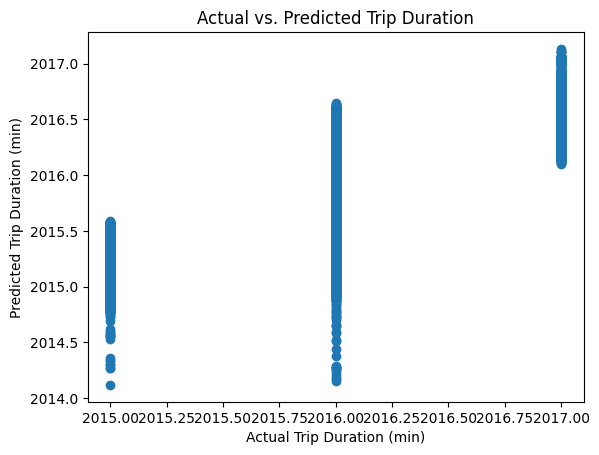

In [19]:
# Separate features (X) and target variable (y)
# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
bicycle_data_imputed = imputer.fit_transform(bicycle_data)

# Separate features (X) and target variable (y)
X = bicycle_data_imputed[:, :-1]  # Features
y = bicycle_data_imputed[:, -1]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the model's coefficients
coefficients = pd.DataFrame({'feature': bicycle_data.drop(columns=['Trip_Duration_in_min']).columns, 'coefficient': model.coef_})
print(coefficients)

# Visualize actual vs. predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Trip Duration (min)")
plt.ylabel("Predicted Trip Duration (min)")
plt.title("Actual vs. Predicted Trip Duration")
plt.show()
